In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
df =pd.read_csv('/Users/ronaldojerang/Desktop/oliefolder/cancer.csv')

In [8]:
df

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...
95,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,B,22,14,78,451,0.105,0.071,0.190,0.066
97,B,19,27,62,295,0.102,0.053,0.135,0.069
98,B,21,24,74,413,0.090,0.075,0.162,0.066


<AxesSubplot:xlabel='radius', ylabel='texture'>

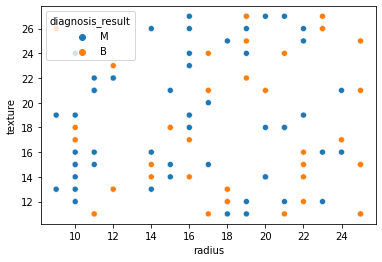

In [9]:
sns.scatterplot(data = df,x = 'radius', y = 'texture',hue ='diagnosis_result' )

In [10]:
df.isnull().sum()

diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [12]:
df2 = pd.get_dummies(df,columns=['diagnosis_result'],drop_first =True)

In [13]:
df2

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result_M
0,23,12,151,954,0.143,0.278,0.242,0.079,1
1,9,13,133,1326,0.143,0.079,0.181,0.057,0
2,21,27,130,1203,0.125,0.160,0.207,0.060,1
3,14,16,78,386,0.070,0.284,0.260,0.097,1
4,9,19,135,1297,0.141,0.133,0.181,0.059,1
...,...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056,1
96,22,14,78,451,0.105,0.071,0.190,0.066,0
97,19,27,62,295,0.102,0.053,0.135,0.069,0
98,21,24,74,413,0.090,0.075,0.162,0.066,0


In [14]:
# since the perimeter is not same  in all the columns we will make sure that all are in same unitor scale

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
x = df2.drop('diagnosis_result_M',axis = 1)

In [19]:
x

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056
96,22,14,78,451,0.105,0.071,0.190,0.066
97,19,27,62,295,0.102,0.053,0.135,0.069
98,21,24,74,413,0.090,0.075,0.162,0.066


In [20]:
# fitting
scaler.fit(x)

StandardScaler()

In [21]:
X = pd.DataFrame(data = scaler.transform(x),columns = x.columns)

In [22]:
X

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1.266830,-1.205746,2.301611,0.789417,2.764210,2.486970,1.594151,1.764464
1,-1.617011,-1.012208,1.537520,1.958830,2.764210,-0.784061,-0.397314,-0.948199
2,0.854853,1.697335,1.410172,1.572169,1.528655,0.547364,0.451507,-0.578290
3,-0.587068,-0.431591,-0.797201,-0.996139,-2.246650,2.585594,2.181796,3.983916
4,-1.617011,0.149025,1.622419,1.867666,2.626926,0.103555,-0.397314,-0.701593
...,...,...,...,...,...,...,...,...
95,1.266830,-0.431591,1.495071,1.763927,-0.805170,0.070681,0.549448,-1.071502
96,1.060841,-0.818669,-0.797201,-0.791806,0.155817,-0.915560,-0.103491,0.161527
97,0.442876,1.697335,-1.476393,-1.282205,-0.050109,-1.211432,-1.899074,0.531435
98,0.854853,1.116719,-0.966999,-0.911262,-0.873811,-0.849811,-1.017606,0.161527


In [26]:
y = df2['diagnosis_result_M']

In [27]:
y

0     1
1     0
2     1
3     1
4     1
     ..
95    1
96    0
97    0
98    0
99    1
Name: diagnosis_result_M, Length: 100, dtype: uint8

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test,y_train, y_test = train_test_split(X,y,train_size=.2)

In [34]:
from sklearn.neighbors import KNeighborsClassifier 

In [35]:
knn =KNeighborsClassifier (n_neighbors=1)

In [36]:
knn.fit(X_test,y_test)

KNeighborsClassifier(n_neighbors=1)

In [37]:
y_pred = knn.predict(X_test)

In [38]:
from sklearn.metrics import classification_report , plot_confusion_matrix

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [50]:
for i in range(2,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_test,y_test)
    y_pred = knn.predict(X_test)
    print('k =' ,i)
    print(classification_report(y_test,y_pred))

k = 2
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        30
           1       1.00      0.86      0.92        50

    accuracy                           0.91        80
   macro avg       0.91      0.93      0.91        80
weighted avg       0.93      0.91      0.91        80

k = 3
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        30
           1       0.87      0.96      0.91        50

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.88        80
weighted avg       0.89      0.89      0.89        80

k = 4
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        30
           1       0.87      0.82      0.85        50

    accuracy                           0.81        80
   macro avg       0.80      0.81      0.80        80
weighted avg       0.82      0.81      0.81        80

k

In [ ]:
# just to check if rest of the n distance will give more accuracy 